In [26]:
import random
import matplotlib.pyplot as plt

import torch
from omegaconf import OmegaConf
import models

from torch import nn
from utils import seed_all
from data import get_gield

device = 'cuda:0'

ImportError: cannot import name 'get_gield' from 'data' (/home/anthony/meent/examples/applications/electric-field-fno/data.py)

In [21]:
log_dir = '1000-50-4'
model_dir = log_dir + '/model-final.pt'
cfg = OmegaConf.load(log_dir + '/.hydra/config.yaml')

model = getattr(models, cfg.model)(**cfg.model_config)
model.load_state_dict(torch.load(model_dir, map_location=torch.device('cpu')))
model.eval()

seed_all(cfg.seed)

test_ds = torch.load(log_dir+'/1000-50-4-test-ds.pt')

# Electric field prediction

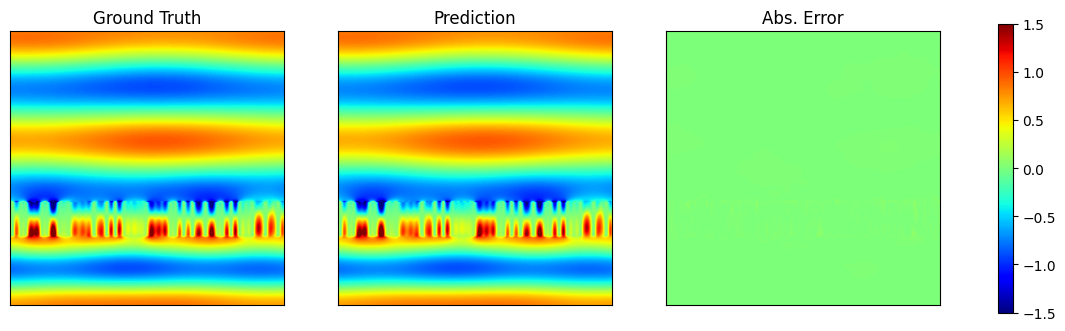

In [19]:
model = model.to(device)
idx = random.randint(0, 2000)
with torch.no_grad():
    out = model(x=test_ds[idx]['x'].unsqueeze(0).to(device)).detach().cpu()
y = test_ds[idx]['y'].unsqueeze(0)

v = 1.5
vmin = -v
vmax = v

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
axes[0].imshow(out[0][0], cmap='jet', vmin=vmin, vmax=vmax)
axes[0].set_title('Ground Truth')
axes[0].set_xticks([], [])
axes[0].set_yticks([], [])

axes[1].imshow(y[0][0], cmap='jet', vmin=vmin, vmax=vmax)
axes[1].set_title('Prediction')
axes[1].set_xticks([], [])
axes[1].set_yticks([], [])

error = (y[0][0]-out[0][0]).abs()
im = axes[2].imshow(error, cmap='jet', vmin=vmin, vmax=vmax)
axes[2].set_title('Abs. Error')
axes[2].set_xticks([], [])
axes[2].set_yticks([], [])

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.25)

plt.show()

# Super resolution

In [25]:
f = nn.Upsample(scale_factor=1.5, mode='nearest')
upscaled_x = f(test_ds[0]['x'])

In [ ]:
get_field(upscaled_x, 1100, 70)